In [ ]:
# Team 1 : Python for Data Science (Kelas Siska Anggraeni)
# Studi Independen Kampus Merdeka - IBM Advance AI - Infinite Learning (Batam, Indonesia)

# This project aims to unveil the potential insights of the service industry from the given dataset.
# And to predict the nuances of tipping behavior within the restaurant realm using several machine learning algorithms:
# 1. Linear Regression
# 2. Random Forest
# 3. Decision Tree
# 4. Naive Bayes
# 5. SVM

# The dataset can be accessed via this link: https://www.kaggle.com/datasets/vishakhdapat/waiter-tip-
# The code program can be accessed via this link: https://www.kaggle.com/code/mrsimple07/waiter-tip-analysis-prediction

In [ ]:
# Package installation

import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import dataset

url = 'https://drive.google.com/uc?id=1dR6t0bgPR765Mz7lOXW0SevTHTx-mXgD'
output = 'tips.csv'
gdown.download(url, output, quiet=False)
df = pd.read_csv(output)

# Read CSV as dataframe (df)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1dR6t0bgPR765Mz7lOXW0SevTHTx-mXgD
To: /content/tips.csv
100%|██████████| 7.94k/7.94k [00:00<00:00, 5.26MB/s]


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Dataset pre-processing: Gaining dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

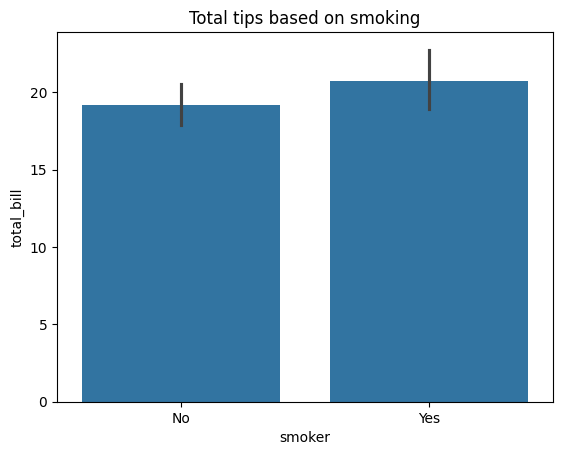

In [ ]:
# Exploratory Data Analysis (EDA):
# Total tips based on smoking.

sns.barplot(x = df['smoker'], y = df['total_bill'])
plt.title('Total tips based on smoking')
plt.show()

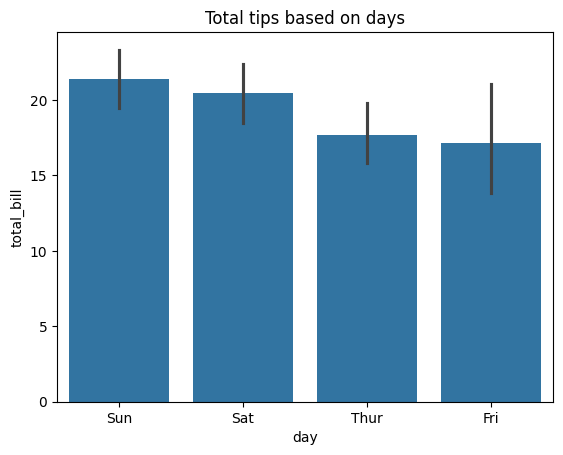

In [ ]:
# Exploratory Data Analysis (EDA):
# Total tips based on days.

sns.barplot(x = df['day'], y = df['total_bill'])
plt.title('Total tips based on days')
plt.show()

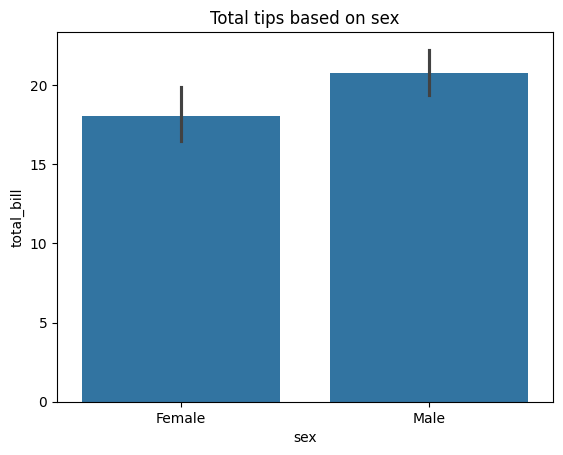

In [ ]:
# Exploratory Data Analysis (EDA):
# Total tips based on sex.

sns.barplot(x = df['sex'], y = df['total_bill'])
plt.title('Total tips based on sex')
plt.show()

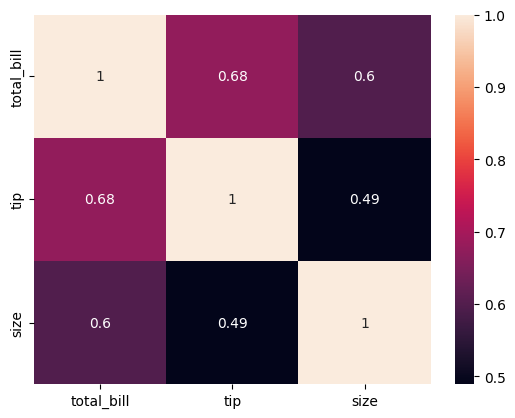

In [ ]:
# Exploratory Data Analysis (EDA):
# Correlation matrix of the features.

correlation_matrix = df[['total_bill','tip', 'size']].corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

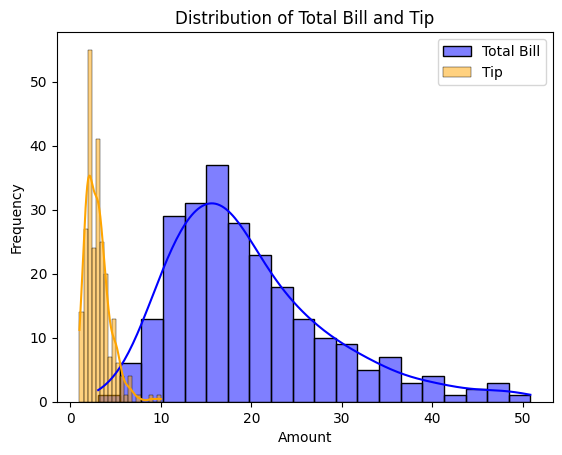

In [ ]:
# Exploratory Data Analysis (EDA):
# Histogram plot: Distribution of Total Bill and Tip

sns.histplot(df['total_bill'], bins=20, kde=True, color='blue', label='Total Bill')
sns.histplot(df['tip'], bins=20, kde=True, color='orange', label='Tip')
plt.title('Distribution of Total Bill and Tip')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<ipython-input-12-cc3f23f24583>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='total_bill', data=df, palette='viridis')


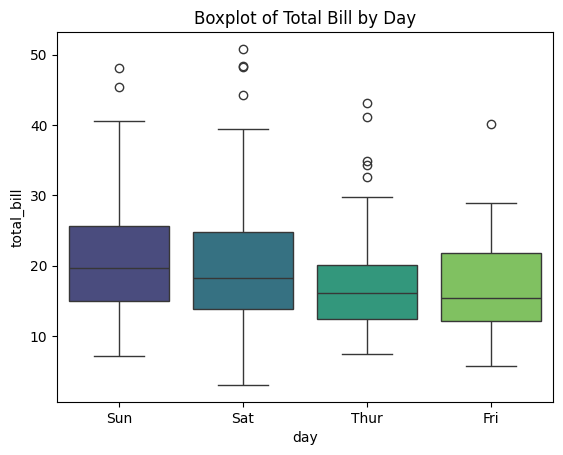

In [ ]:
# Exploratory Data Analysis (EDA):
# Boxplot: Total bill by day.

sns.boxplot(x='day', y='total_bill', data=df, palette='viridis')
plt.title('Boxplot of Total Bill by Day')
plt.show()

<ipython-input-13-a3282b7db167>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='tip', data=df, palette='pastel')


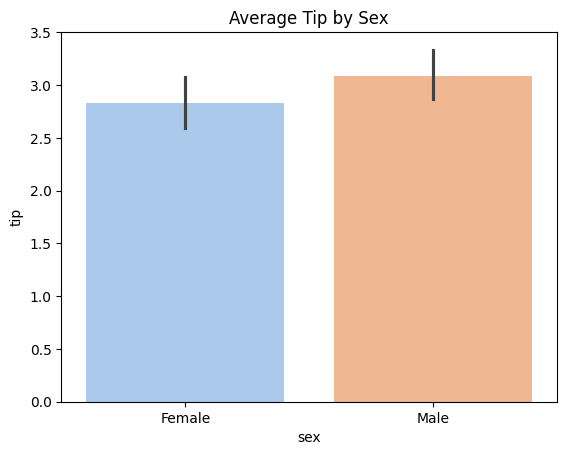

In [ ]:
# Exploratory Data Analysis (EDA):
# Average tips by sex

sns.barplot(x='sex', y='tip', data=df, palette='pastel')
plt.title('Average Tip by Sex')
plt.show()

In [ ]:
# Machine Learning: Model Training and Evaluation
# One - Hot encoding

df= pd.get_dummies(df, columns = ['sex', 'smoker', 'day','time'], drop_first =True)
df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0


Mean Squared Error: 0.7033566017436106
RMSE: 0.8386635807900631
MAE: 0.6671331480264893
R²: 0.43730181943482493


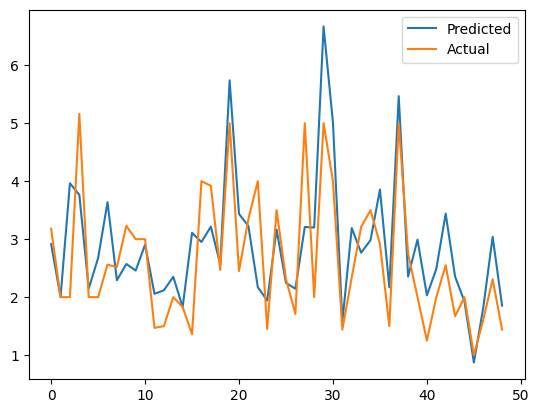

In [ ]:
# Prediction Model using Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

X, y = df.drop(['tip'], axis=1), df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.legend()
plt.show()

Mean Squared Error: 0.9196720148979602
RMSE: 0.9589953153680993
MAE: 0.7557163265306125
R²: 0.2642455218065466


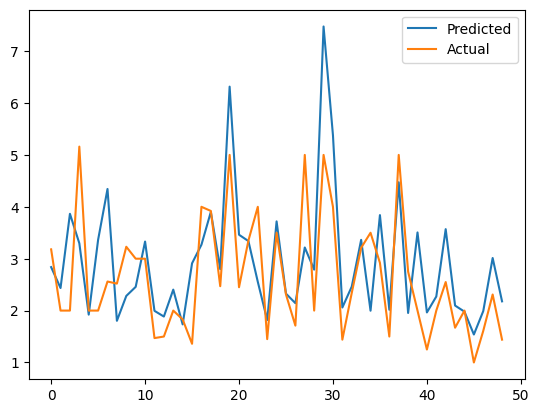

In [ ]:
# Prediction model using Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

X, y = df.drop(['tip'], axis=1), df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.legend()
plt.show()

Mean Squared Error: 1.2174469387755102
RMSE: 1.1033797799377647
MAE: 0.8459183673469388
R²: 0.026020121677424846


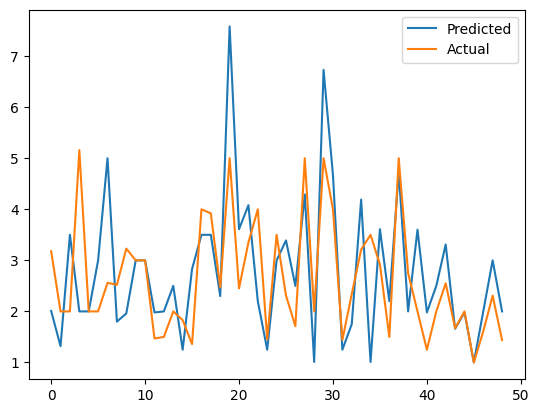

In [ ]:
#Prediction Model using Decision Tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X, y = df.drop(['tip'], axis=1), df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.legend()
plt.show()

In [ ]:
#Classification Model using Naive Bayes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

X, y = df.drop(['tip'], axis=1), df['size']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelnb = GaussianNB()
nbtrain = modelnb.fit(X_train, y_train)

y_pred = nbtrain.predict(X_test)

# Evaluation metrics for classification
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9591836734693877
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.96        49
   macro avg       0.67      0.67      0.67        49
weighted avg       0.96      0.96      0.96        49



In [ ]:
#Classification using SVM

import pandas as pd
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

X, y = df.drop(['tip'], axis=1), df['size']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#Evaluation metrics for classification
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9591836734693877
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00         8
           4       0.88      1.00      0.93         7
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.96        49
   macro avg       0.65      0.67      0.66        49
weighted avg       0.94      0.96      0.95        49

Accuracy: 0.9591836734693877


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
